In [5]:
pip install numpy pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv(r"D:\5th sem\machine learning\Water Quality Prediction.csv")

# Specify categorical columns
categorical_columns = ['Color', 'Source', 'Month']

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop the 'Index' column as it's not needed for the analysis
df = df.drop(columns=['Index'])


In [11]:
import numpy as np

# Separate features and target
features = df.drop(columns=['Target'])
target = df['Target']

# Separate data based on classes
class_0 = features[target == 0]
class_1 = features[target == 1]

# Calculate the mean (centroid) for each class
centroid_0 = class_0.mean(axis=0)
centroid_1 = class_1.mean(axis=0)

# Calculate spread (standard deviation) for each class
spread_0 = class_0.std(axis=0)
spread_1 = class_1.std(axis=0)

# Calculate the distance between mean vectors (Euclidean distance)
distance_between_centroids = np.linalg.norm(centroid_0 - centroid_1)

print("Centroid for class 0:\n", centroid_0)
print("Centroid for class 1:\n", centroid_1)
print("Spread for class 0:\n", spread_0)
print("Spread for class 1:\n", spread_1)
print("Distance between class centroids:", distance_between_centroids)


Centroid for class 0:
 pH                          7.465185
Iron                        0.070698
Nitrate                     5.782838
Chloride                  174.293907
Lead                        0.000586
Zinc                        1.460667
Turbidity                   0.371551
Fluoride                    0.865034
Copper                      0.424425
Odor                        1.679067
Sulfate                   139.806499
Conductivity              424.886924
Chlorine                    3.178594
Manganese                   0.045692
Total Dissolved Solids    257.020851
Water Temperature          19.161493
Air Temperature            60.007485
Day                        15.733329
Time of Day                11.495902
Color_Faint Yellow          0.172877
Color_Light Yellow          0.094348
Color_Near Colorless        0.345374
Color_Yellow                0.041315
Source_Ground               0.123174
Source_Lake                 0.122317
Source_Reservoir            0.122457
Source_River   

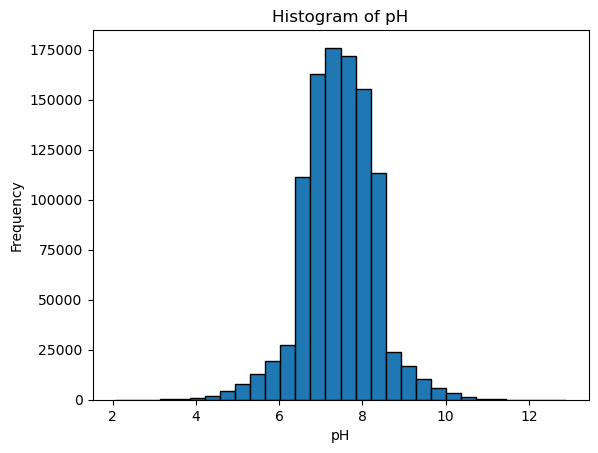

Mean of pH: 7.449869487765476
Variance of pH: 0.7188420376271661


In [13]:
import matplotlib.pyplot as plt

# Choose a feature, for example, 'pH'
feature_name = 'pH'
feature_data = df[feature_name]

# Plot histogram
plt.hist(feature_data, bins=30, edgecolor='k')
plt.title(f'Histogram of {feature_name}')
plt.xlabel(f'{feature_name}')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean_value = feature_data.mean()
variance_value = feature_data.var()

print(f'Mean of {feature_name}: {mean_value}')
print(f'Variance of {feature_name}: {variance_value}')


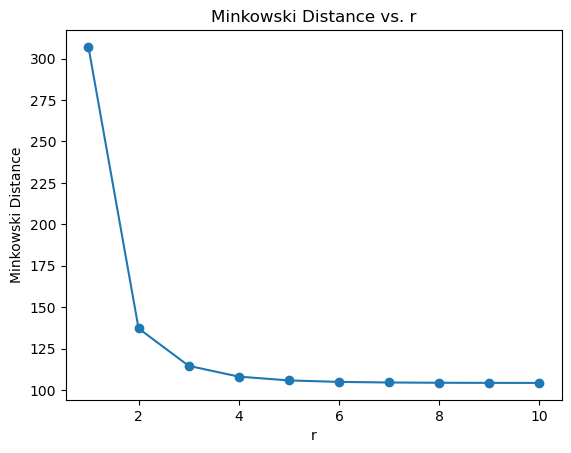

In [24]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

# Fill NaNs with the mean of each feature
features_clean = features.fillna(features.mean())

# Choose two feature vectors, for example, the first and second row
vector1 = features_clean.iloc[0].astype(float).values
vector2 = features_clean.iloc[1].astype(float).values

minkowski_distances = []

# Calculate Minkowski distance for r from 1 to 10
for r in range(1, 11):
    dist = distance.minkowski(vector1, vector2, r)
    minkowski_distances.append(dist)

# Plot the distances
plt.plot(range(1, 11), minkowski_distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

# Features and target
X = features
y = target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')


Training set size: 734002
Test set size: 314573


In [28]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [32]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Keep the corresponding y values
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Keep the corresponding y values


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [36]:
# Test accuracy
accuracy = knn.score(X_test, y_test)
print(f'Accuracy of kNN classifier (k=3): {accuracy}')


Accuracy of kNN classifier (k=3): 0.7676210997389467


In [37]:
# Predict the class for the test set
predictions = knn.predict(X_test)

# Print first few predictions
print(f'Predictions for the test set:\n {predictions[:10]}')


Predictions for the test set:
 [0 0 1 0 0 1 1 0 0 1]


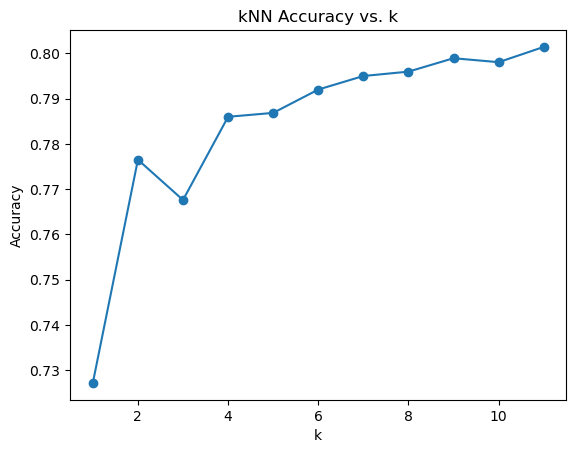

In [38]:
accuracies = []

# Vary k from 1 to 11
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot accuracy vs. k
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('kNN Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

# Performance metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Analyzing the model's performance
if precision > 0.8 and recall > 0.8:
    print("The model seems to have a good fit (regularfit).")
elif precision > recall:
    print("The model might be underfitting.")
else:
    print("The model might be overfitting.")


Confusion Matrix:
 [[150422  16854]
 [ 33618  16303]]
Precision: 0.49169104563139004
Recall: 0.3265759900643016
F1-Score: 0.3924745419966778
The model might be underfitting.


Confusion Matrix:
 [[150422  16854]
 [ 33618  16303]]
Precision: 0.49169104563139004
Recall: 0.3265759900643016
F1-Score: 0.3924745419966778
The model might be underfitting.


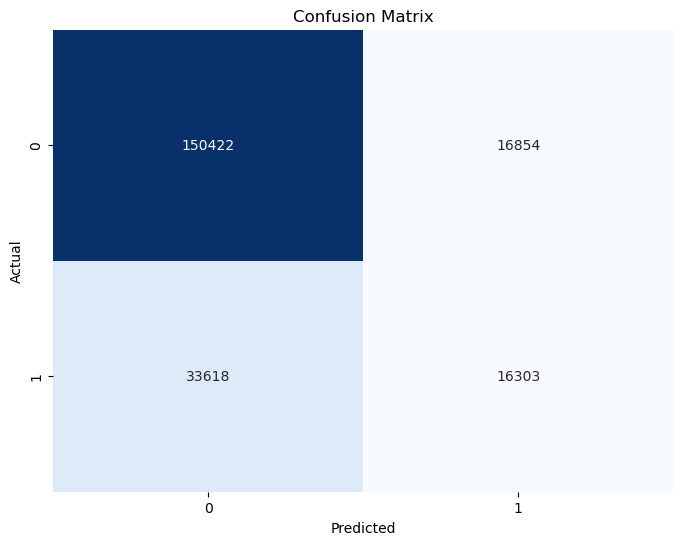

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

# Performance metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Analyzing the model's performance
if precision > 0.8 and recall > 0.8:
    print("The model seems to have a good fit (regular fit).")
elif precision > recall:
    print("The model might be underfitting.")
else:
    print("The model might be overfitting.")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
